In [16]:
import sys
import os
import json

if '..//..//' not in sys.path:
    sys.path.append('..//../')

from opmsim.optical_system_base import OpticalSystem
from opmsim import optical_elements
from opmsim import dipole_source
import numpy as np
from matplotlib import pyplot as plt


## Element setup and save paths

In [40]:
savepath = "C:/Users/lnr19/OneDrive - Imperial College London/thesis/for _thesis/modelling/pupils/"

savepath_full = os.path.join(savepath, "OPM_nico2")
if not os.path.exists(savepath_full):
    os.makedirs(savepath_full)
save_filename = os.path.join(savepath_full,'collection_efficiency.txt')
save_details = os.path.join(savepath_full,'system_focal_lengths.txt')


# setup
# O1
M_O1 = 60
NA_O1 = 1.2
n_O1 =1.33
f_TL1 = 0.180  # Olympus
f_O1 = f_TL1/M_O1

# high NA O1 (Nikon)
M_O1_h = 60
NA_O1_h = 1.27
n_O1_h = 1.33
f_TL1_h = 0.20  # Nikon
f_TL1_h = 0.18  # Using original Olympus TL, then use 162mm TL2 if using Thorlabs O2!

f_O1_h = 0.2/M_O1

# long WD (O3 or O2)
M_LWD = 50
NA_LWD = 0.75
f_LWD = 0.2/M_LWD

# O2
M_olympus_50x = 50
NA_olympus_50x = 0.95
f_olympus_50x = 0.180/M_olympus_50x

f_TL2 = 0.162#0.180  # Olympus
f_TL2_flipped = 0.180# 0.150376
# f_TL2_flipped = 0.180451128

# f_TL2_flipped = 0.162# 0.150376

# O3 (original)
M_O3 = 40
NA_O3 = 0.6
n_O3 = 1
f_TL3 = 0.1013  
f_O3 = 0.2/M_O3 # Nikon

opm_angles = [0, 35, 45]#,18.2, 23.2]
# opm_angles = 


In [41]:
dipole_count = 7500

options = {
    'ray_count': 10000,
    'draw_rays': False,
    'max_rays_stored': 10000,
}

plot_options = {
    'title': 'Pupil intensity at final image plane of dOPM microscope',
    'add_sim_details': True,
    'max_r_in': 0,
    'scale_range': None# [0,0.3]
}

#opm_angle = 35*np.pi/180

O1 = optical_elements.SineLens(NA=NA_O1, focal_length=f_O1, n=n_O1)
TL1 = optical_elements.SineLens(NA=0.1, focal_length=f_TL1, n=1)
olympus_50x_angled = lambda opm_angle: optical_elements.SineLens(NA=NA_olympus_50x, focal_length=f_olympus_50x, n=1, yAxis_rotation=opm_angle*np.pi/180)
olympus_50x = optical_elements.SineLens(NA=NA_olympus_50x, focal_length=f_olympus_50x, n=1)
TL2 = optical_elements.SineLens(NA=0.1, focal_length=f_TL2, n=1)
TL2_flipped = optical_elements.SineLens(NA=0.1, focal_length=f_TL2_flipped, n=1)
LWD = optical_elements.SineLens(NA=NA_LWD, focal_length=f_LWD, n=1)
LWD_angled = lambda opm_angle: optical_elements.SineLens(NA=NA_LWD, focal_length=f_LWD, n=1, yAxis_rotation=opm_angle*np.pi/180)
TL3 = optical_elements.SineLens(NA=0.1, focal_length=f_TL3, n=1)
O3 = lambda opm_angle: optical_elements.SineLens(NA=NA_O3, focal_length=f_O3, n=1, yAxis_rotation=opm_angle*np.pi/180)

elements_fun = lambda opm_angle: [O1, TL1, TL2, olympus_50x, LWD_angled(opm_angle)]
# elements_fun = lambda opm_angle: [O1, TL1, TL2_flipped, LWD, olympus_50x_angled(opm_angle)]


s_pol = lambda opm_angle: (0, (90-opm_angle)*np.pi/180)
p_pol = (np.pi/2,0)

plot_options_p = plot_options; plot_options_s = plot_options; plot_options_un = plot_options;
plot_options_p['scale_range'] = [0,3,4]
plot_options_s['scale_range'] = [0,3,4]
plot_options_un['scale_range'] = [0,7,5]

Full sphere generation
cap method area sum 12.564694874875116
expected area sum 6.283185307179586
cap method area sum 3.5738661437335946
expected area sum 3.5738661731158983


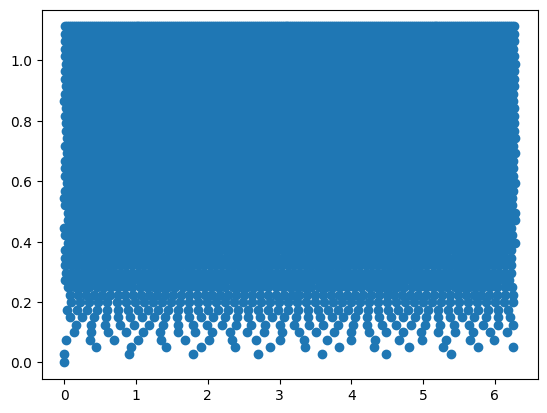

n_dipoles 7499
n_rays 5860
pvec shape (7499, 1, 3)
nvec shape (1, 5860, 3)
(7499, 5860, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
cap method area sum 6.283185277694102
expected area sum 6.283185307179586
n_dipoles 7499
n_rays 10251
pvec shape (7499, 1, 3)
nvec shape (1, 10251, 3)
(7499, 10251, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
n rays 2pi =  10251
(5860, 3, 1)
n rays =  5860
NA area vs real area? 3.5738661437335946 3.5738661731158983
half_sphere_energy 4.188790708032343
initial_energy 2.382624774981475
rays when NA scaled up to hemisphere 10302.418842583545
initialisation time in system 22.608361s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53340>
CURVED REFRACTION
max rho curved 0.002690606786877742
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53820>
max rho flat 0.0035785070265473974
FLAT REFRACTION
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53B80>
CURVED REFRACTION
max rho curved 0.0
ELEMENT:

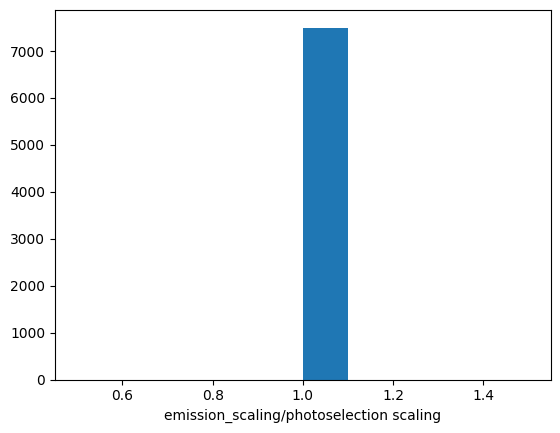

Limiting radius for detector: 0.0036
Energy ratio (efficiency): 0.6032514551331618
Total energy per dipole per ray: 1.4373218625438968
Energy from Ix 1178.374591515631
Energy from Iy 1178.374591515631
X/Y energy ratio = 1.0
Half sphere energy 4.188790708032343
Initial energy 2.382624774981475
half sphere energy NA 2.3825777265821206
maxr 0.0036
2325 escaped out of 5860
Saved checkpoint with 10000 rays
2325 escaped out of 5860
time in trace_rays 39.291523s
ray count 3535
max Ix 5.000111225059537
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.002973865843857036
max_r_reduced 0.002973812650678845 max_r 0.002973865843857036


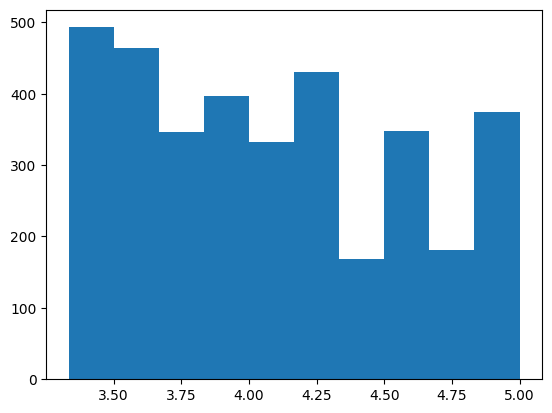

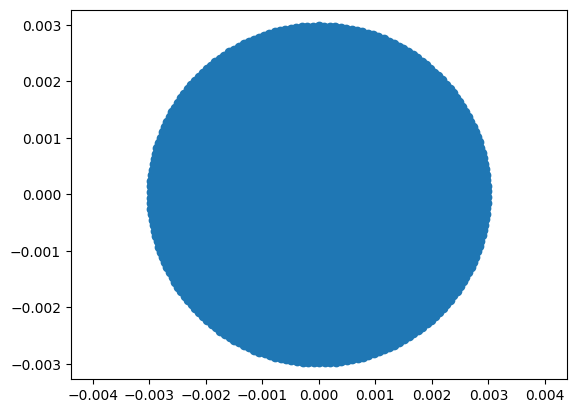

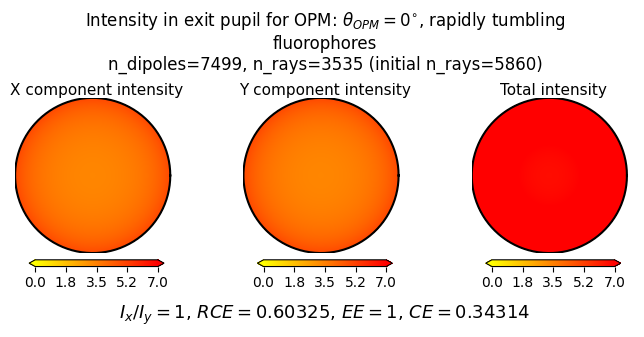

ray count 3535
max Ix 3.333547387795266
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.7453297854278282
max_r_reduced 0.7453164538042215 max_r 0.7453297854278282


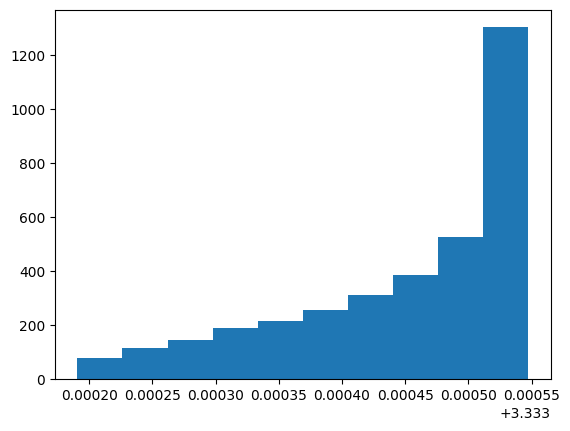

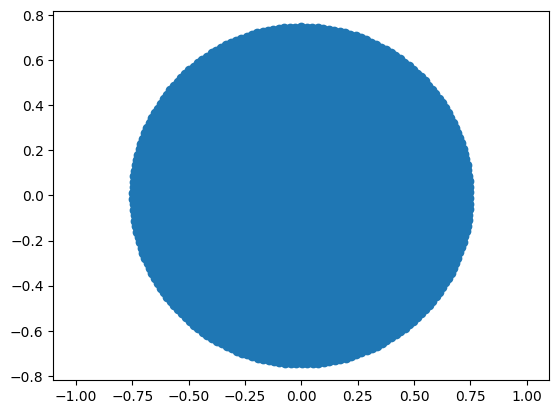

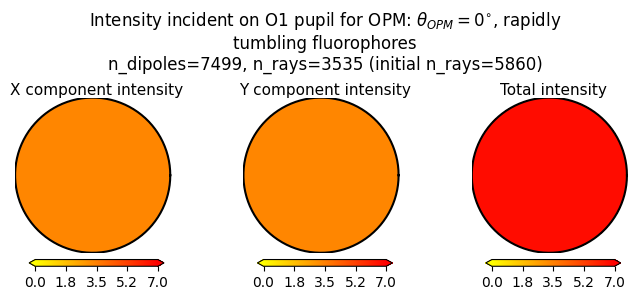

Full sphere generation
cap method area sum 12.564694874875116
expected area sum 6.283185307179586
plot exc arrow


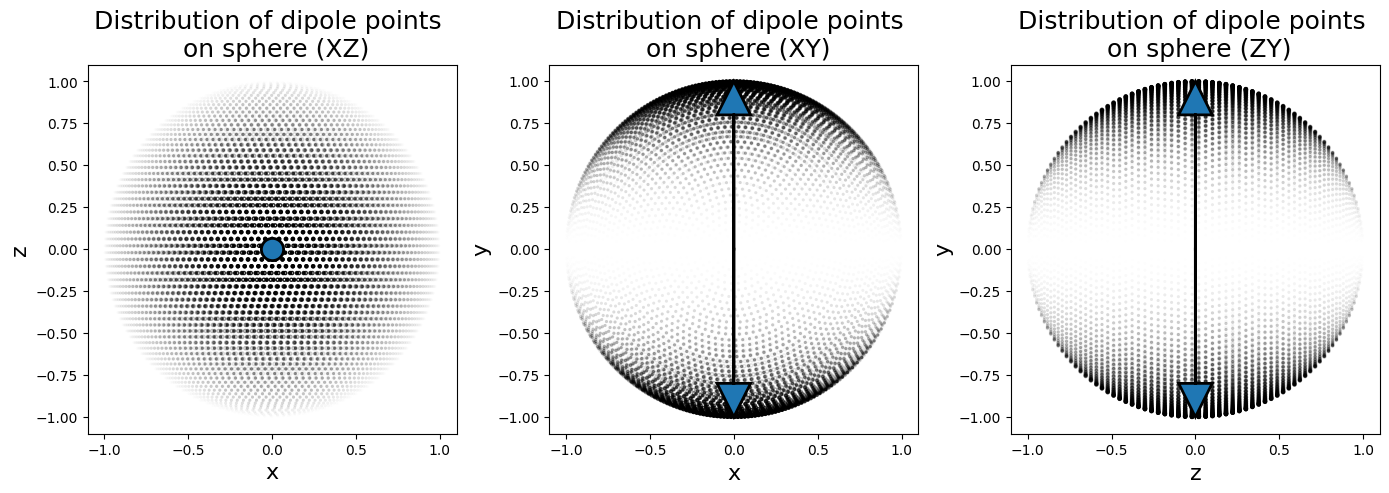

cap method area sum 3.5738661437335946
expected area sum 3.5738661731158983


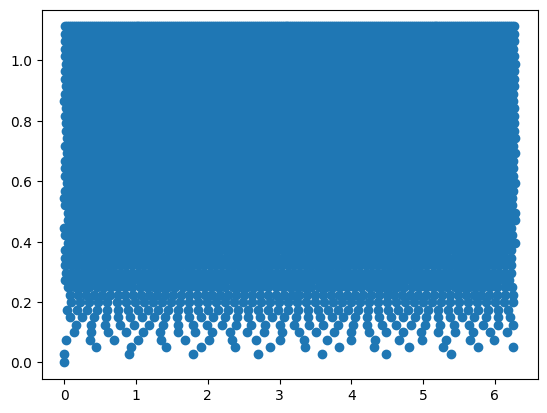

n_dipoles 7499
n_rays 5860
pvec shape (7499, 1, 3)
nvec shape (1, 5860, 3)
(7499, 5860, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
cap method area sum 6.283185277694102
expected area sum 6.283185307179586
n_dipoles 7499
n_rays 10251
pvec shape (7499, 1, 3)
nvec shape (1, 10251, 3)
(7499, 10251, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
n rays 2pi =  10251
(5860, 3, 1)
n rays =  5860
NA area vs real area? 3.5738661437335946 3.5738661731158983
half_sphere_energy 1.397507898300317
initial_energy 0.843768519240068
rays when NA scaled up to hemisphere 10302.418842583545
initialisation time in system 22.701758s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53340>
CURVED REFRACTION
max rho curved 0.002690606786877742
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53820>
max rho flat 0.0035785070265473974
FLAT REFRACTION
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53B80>
CURVED REFRACTION
max rho curved 0.0
ELEMENT:

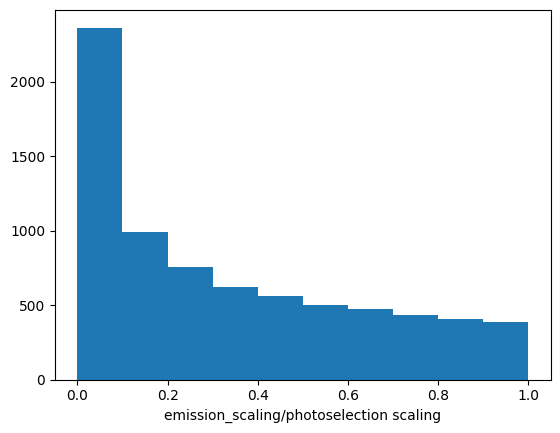

Limiting radius for detector: 0.0036
Energy ratio (efficiency): 0.630033356909467
Total energy per dipole per ray: 0.5316023126313503
Energy from Ix 238.08646850323584
Energy from Iy 633.5716817276775
X/Y energy ratio = 0.37578458029247974
Half sphere energy 1.397507898300317
Initial energy 0.843768519240068
half sphere energy NA 0.794900347928106
maxr 0.0036
2325 escaped out of 5860
Saved checkpoint with 10000 rays
2325 escaped out of 5860
time in trace_rays 37.508855s
ray count 3535
max Ix 1.0560227855362319
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.002973865843857036
max_r_reduced 0.002973812650678845 max_r 0.002973865843857036


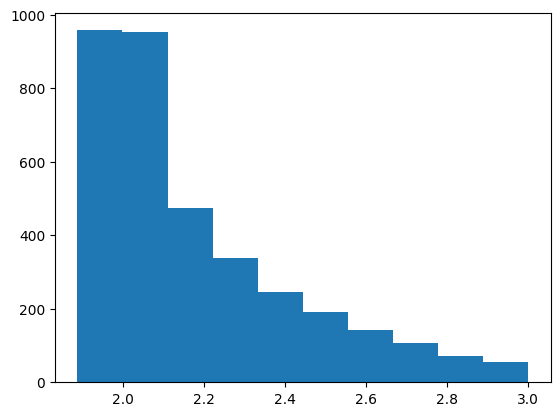

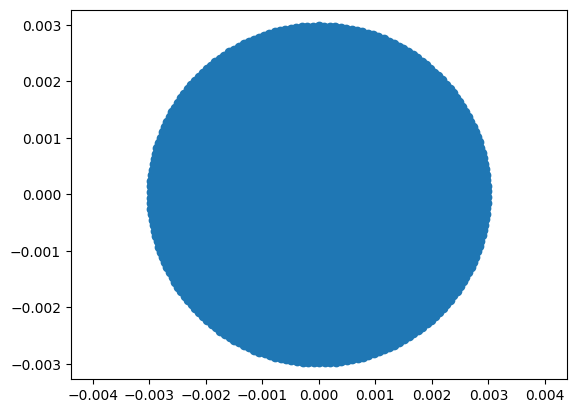

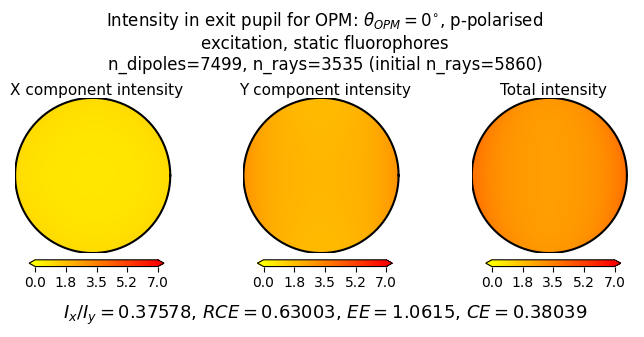

ray count 3535
max Ix 0.704044737913167
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.7453297854278282
max_r_reduced 0.7453164538042215 max_r 0.7453297854278282


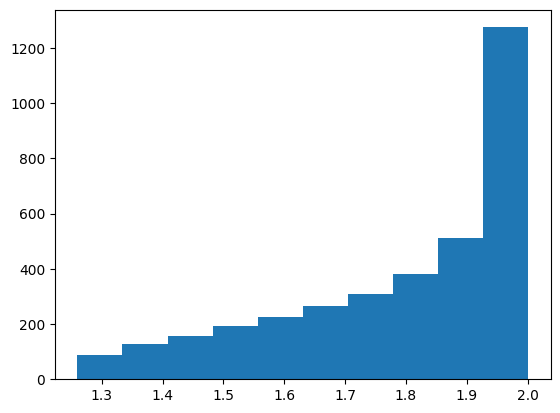

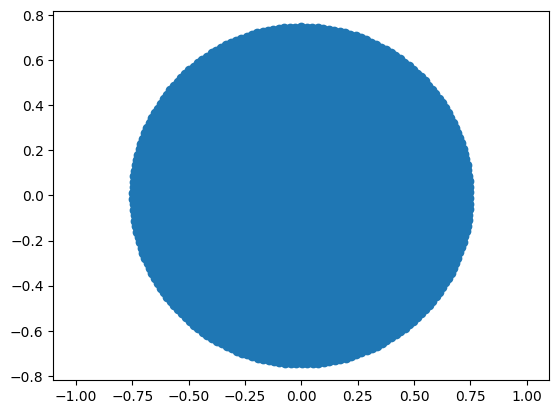

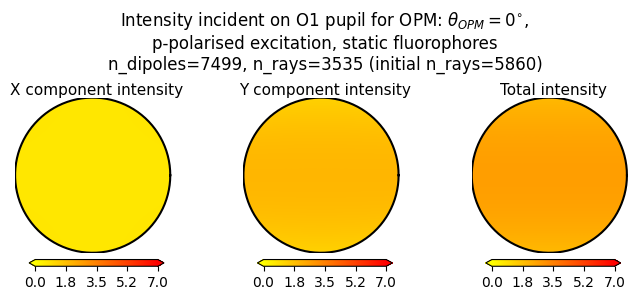

Full sphere generation
cap method area sum 12.564694874875116
expected area sum 6.283185307179586
plot exc arrow


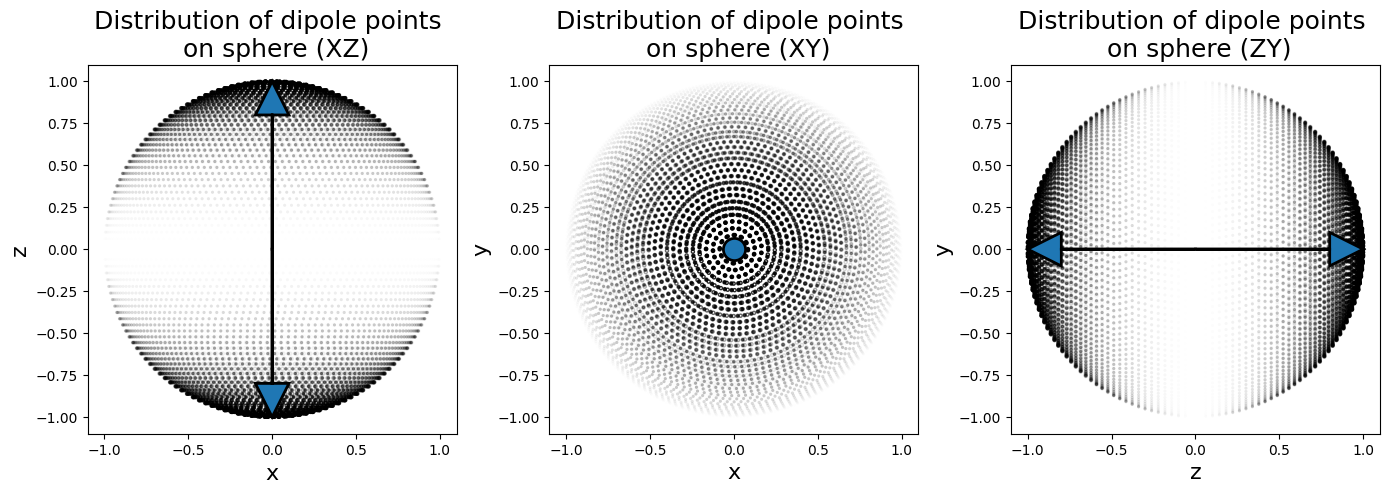

cap method area sum 3.5738661437335946
expected area sum 3.5738661731158983


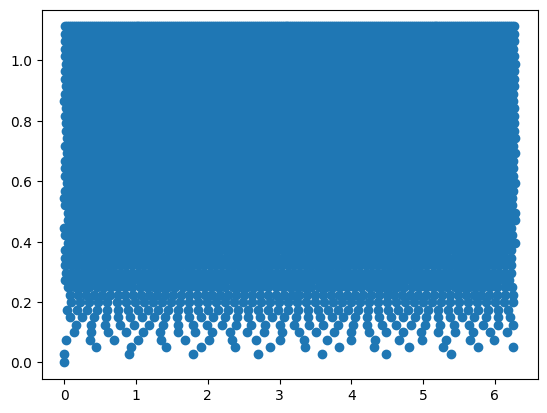

n_dipoles 7499
n_rays 5860
pvec shape (7499, 1, 3)
nvec shape (1, 5860, 3)
(7499, 5860, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
cap method area sum 6.283185277694102
expected area sum 6.283185307179586
n_dipoles 7499
n_rays 10251
pvec shape (7499, 1, 3)
nvec shape (1, 10251, 3)
(7499, 10251, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
n rays 2pi =  10251
(5860, 3, 1)
n rays =  5860
NA area vs real area? 3.5738661437335946 3.5738661731158983
half_sphere_energy 1.394998811439359
initial_energy 0.6958266863837751
rays when NA scaled up to hemisphere 10302.418842583545
initialisation time in system 21.554235s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53340>
CURVED REFRACTION
max rho curved 0.002690606786877742
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53820>
max rho flat 0.0035785070265473974
FLAT REFRACTION
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53B80>
CURVED REFRACTION
max rho curved 0.0
ELEMENT

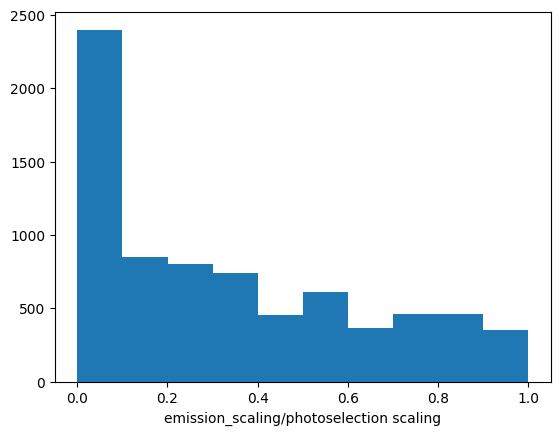

Limiting radius for detector: 0.0036
Energy ratio (efficiency): 0.5383277297151817
Total energy per dipole per ray: 0.3745828003562154
Energy from Ix 307.09812872205987
Energy from Iy 307.09812872205987
X/Y energy ratio = 1.0
Half sphere energy 1.394998811439359
Initial energy 0.6958266863837751
half sphere energy NA 0.7934731831720547
maxr 0.0036
2325 escaped out of 5860
Saved checkpoint with 10000 rays
2325 escaped out of 5860
time in trace_rays 37.752007s
ray count 3535
max Ix 2.1103065467034683
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.002973865843857036
max_r_reduced 0.002973812650678845 max_r 0.002973865843857036


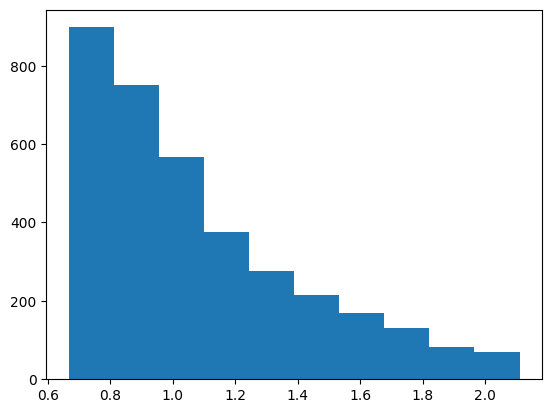

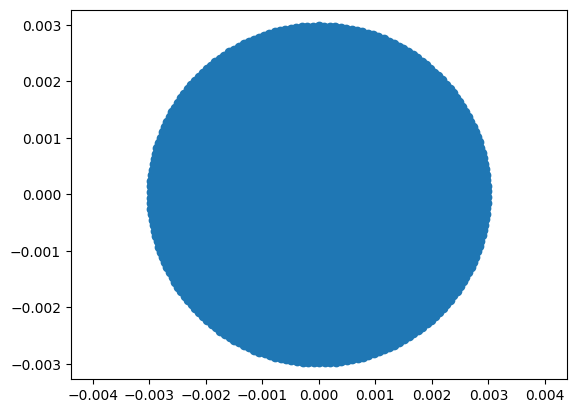

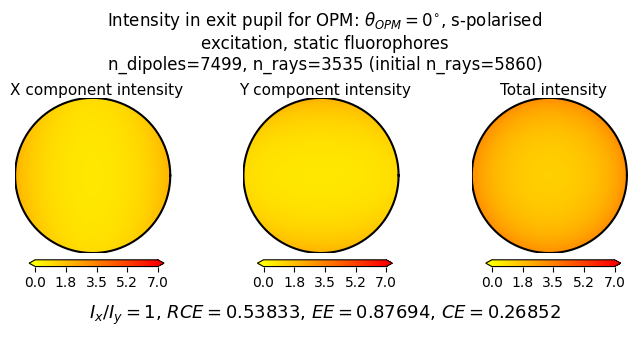

ray count 3535
max Ix 1.4069300775890374
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.7453297854278282
max_r_reduced 0.7453164538042215 max_r 0.7453297854278282


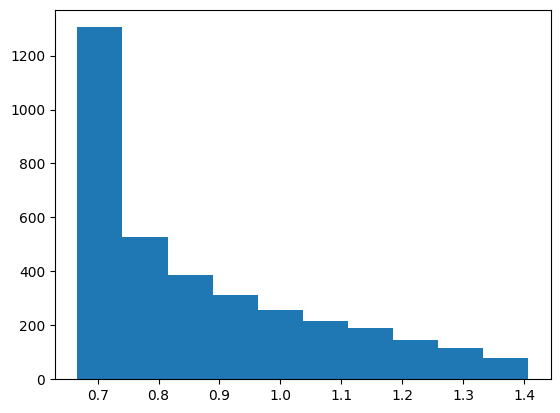

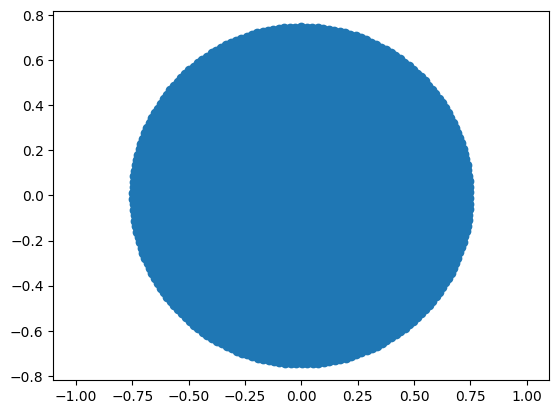

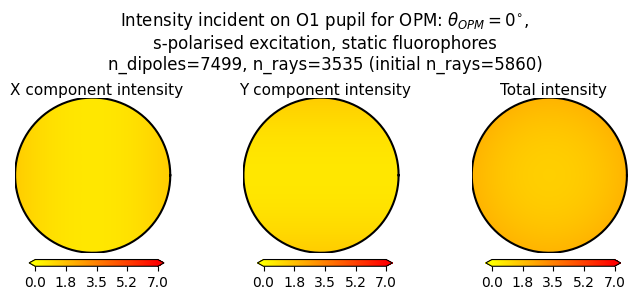

Full sphere generation
cap method area sum 12.564694874875116
expected area sum 6.283185307179586
cap method area sum 3.5738661437335946
expected area sum 3.5738661731158983


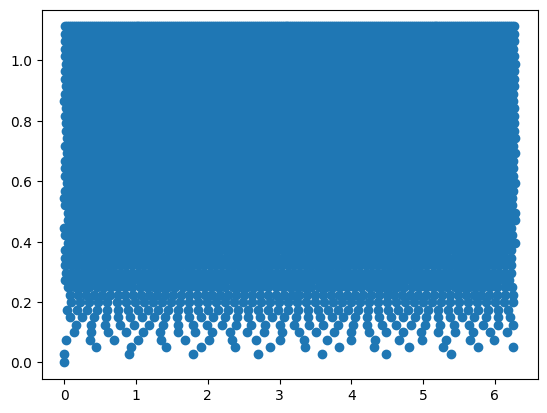

n_dipoles 7499
n_rays 5860
pvec shape (7499, 1, 3)
nvec shape (1, 5860, 3)
(7499, 5860, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
cap method area sum 6.283185277694102
expected area sum 6.283185307179586
n_dipoles 7499
n_rays 10251
pvec shape (7499, 1, 3)
nvec shape (1, 10251, 3)
(7499, 10251, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
n rays 2pi =  10251
(5860, 3, 1)
n rays =  5860
NA area vs real area? 3.5738661437335946 3.5738661731158983
half_sphere_energy 4.188790708032343
initial_energy 2.382624774981475
rays when NA scaled up to hemisphere 10302.418842583545
initialisation time in system 21.744259s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53340>
CURVED REFRACTION
max rho curved 0.002690606786877742
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53820>
max rho flat 0.0035785070265473974
FLAT REFRACTION
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53B80>
CURVED REFRACTION
max rho curved 0.0
ELEMENT:

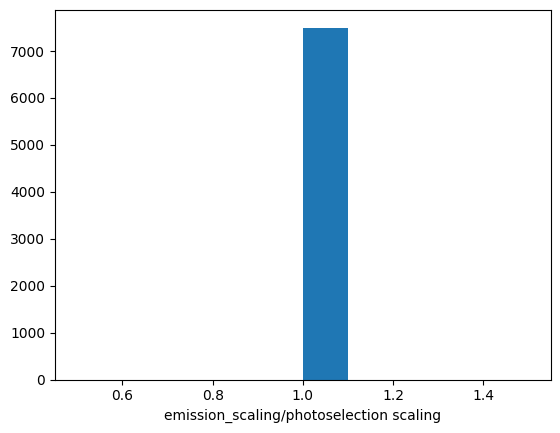

Limiting radius for detector: 0.0036
Energy ratio (efficiency): 0.4866929363234235
Total energy per dipole per ray: 1.15960664789267
Energy from Ix 950.6777304774403
Energy from Iy 950.7071237275488
X/Y energy ratio = 0.9999690827496975
Half sphere energy 4.188790708032343
Initial energy 2.382624774981475
half sphere energy NA 2.3825777265821206
maxr 0.0036
3008 escaped out of 5860
Saved checkpoint with 10000 rays
3008 escaped out of 5860
time in trace_rays 37.289672s
ray count 2852
max Ix 5.070527248481168
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.0029834384093780034
max_r_reduced 0.002983203285190457 max_r 0.0029834384093780034


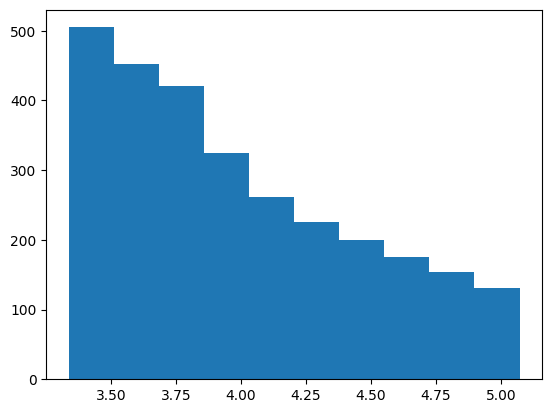

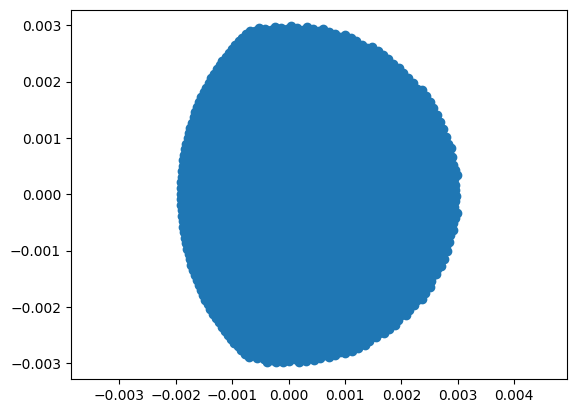

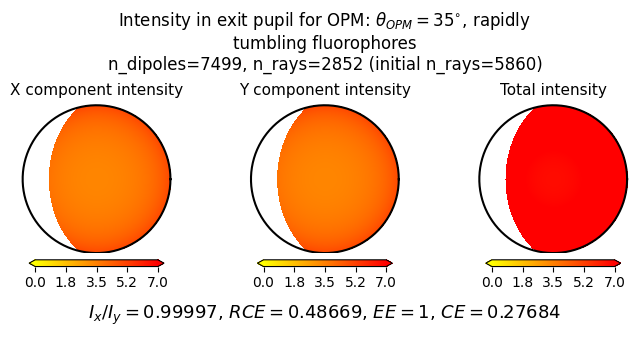

ray count 2852
max Ix 3.333547387795266
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.8968627153376838
max_r_reduced 0.8960760143583334 max_r 0.8968627153376838


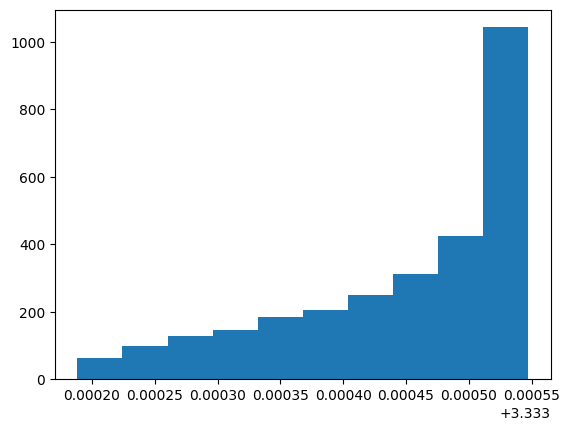

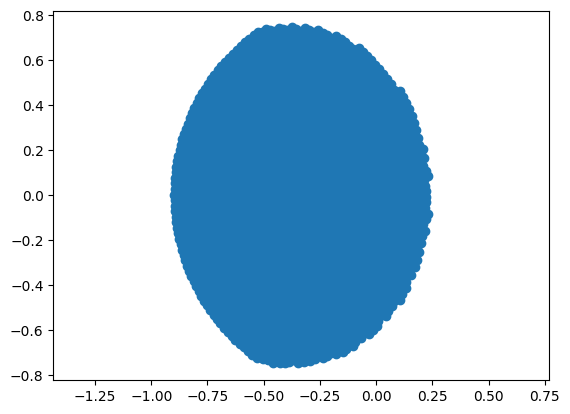

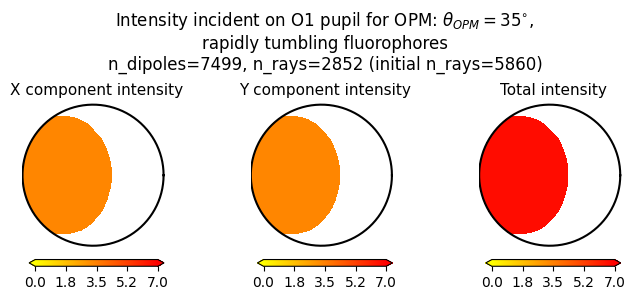

Full sphere generation
cap method area sum 12.564694874875116
expected area sum 6.283185307179586
plot exc arrow


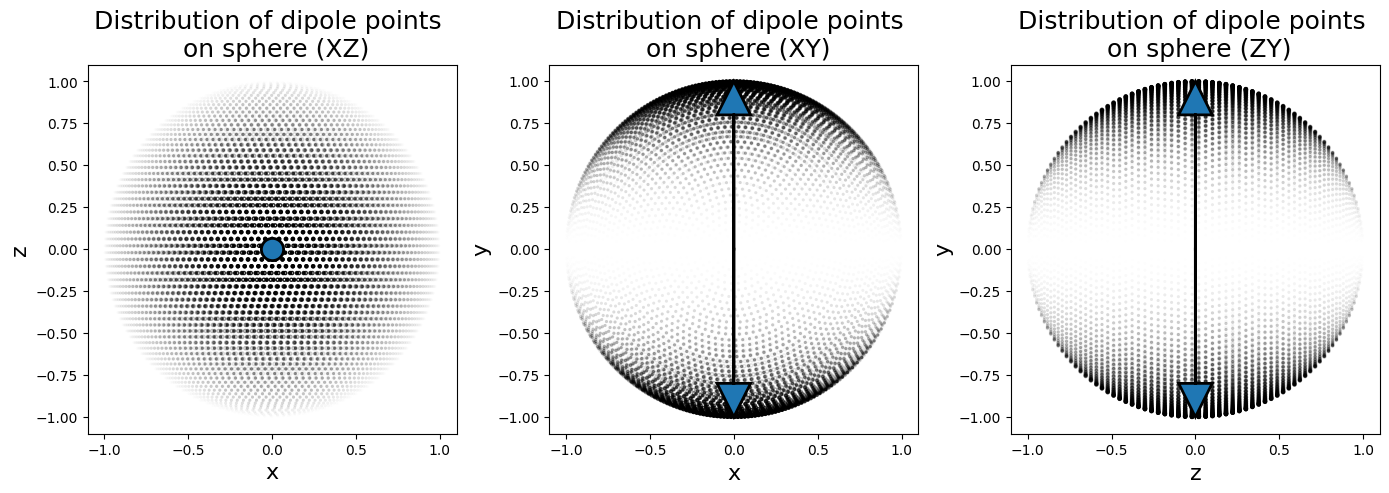

cap method area sum 3.5738661437335946
expected area sum 3.5738661731158983


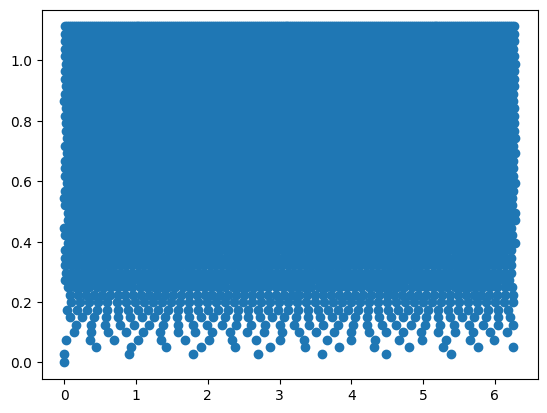

n_dipoles 7499
n_rays 5860
pvec shape (7499, 1, 3)
nvec shape (1, 5860, 3)
(7499, 5860, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
cap method area sum 6.283185277694102
expected area sum 6.283185307179586
n_dipoles 7499
n_rays 10251
pvec shape (7499, 1, 3)
nvec shape (1, 10251, 3)
(7499, 10251, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
n rays 2pi =  10251
(5860, 3, 1)
n rays =  5860
NA area vs real area? 3.5738661437335946 3.5738661731158983
half_sphere_energy 1.397507898300317
initial_energy 0.843768519240068
rays when NA scaled up to hemisphere 10302.418842583545
initialisation time in system 21.224269s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53340>
CURVED REFRACTION
max rho curved 0.002690606786877742
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53820>
max rho flat 0.0035785070265473974
FLAT REFRACTION
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53B80>
CURVED REFRACTION
max rho curved 0.0
ELEMENT:

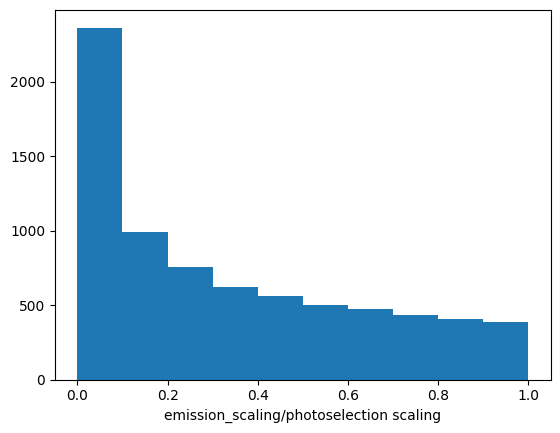

Limiting radius for detector: 0.0036
Energy ratio (efficiency): 0.5075656473176076
Total energy per dipole per ray: 0.42826791465430436
Energy from Ix 191.63344949153998
Energy from Iy 510.589263654736
X/Y energy ratio = 0.37531821198090026
Half sphere energy 1.397507898300317
Initial energy 0.843768519240068
half sphere energy NA 0.794900347928106
maxr 0.0036
3008 escaped out of 5860
Saved checkpoint with 10000 rays
3008 escaped out of 5860
time in trace_rays 36.710812s
ray count 2852
max Ix 1.0635452270538468
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.0029834384093780034
max_r_reduced 0.002983203285190457 max_r 0.0029834384093780034


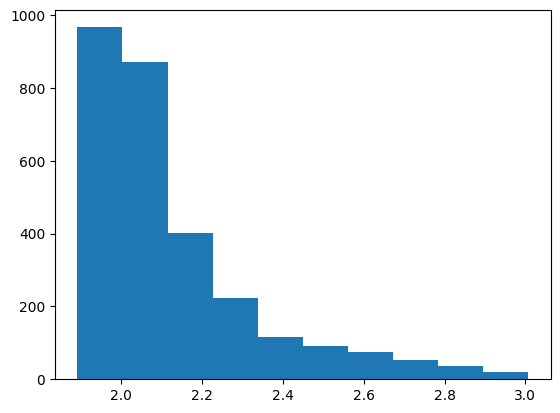

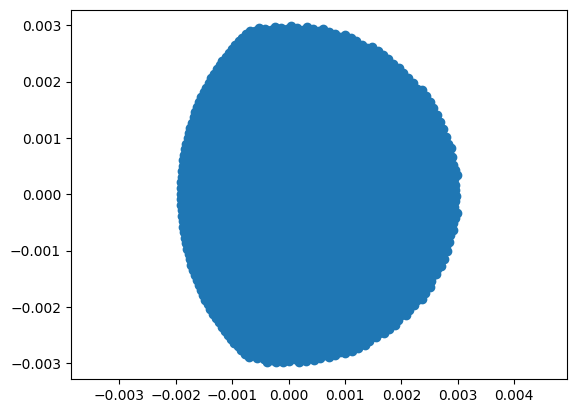

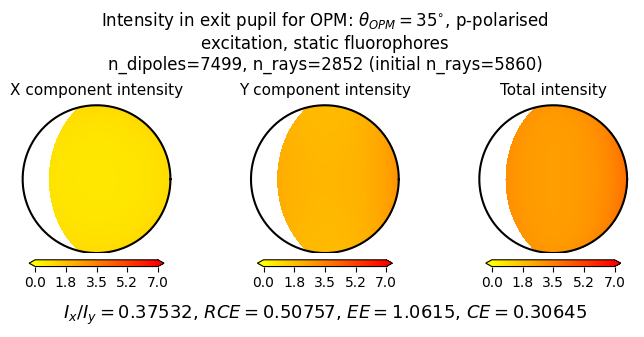

ray count 2852
max Ix 0.7707130161095533
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.8968627153376838
max_r_reduced 0.8960760143583334 max_r 0.8968627153376838


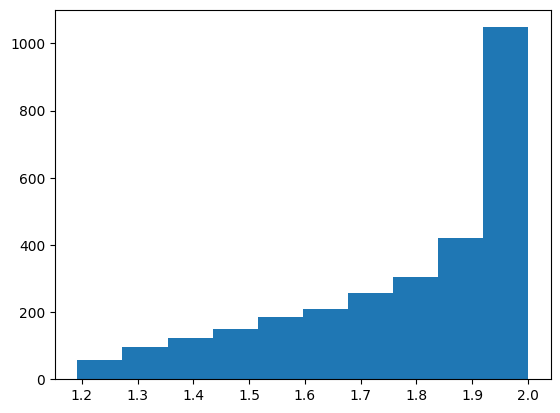

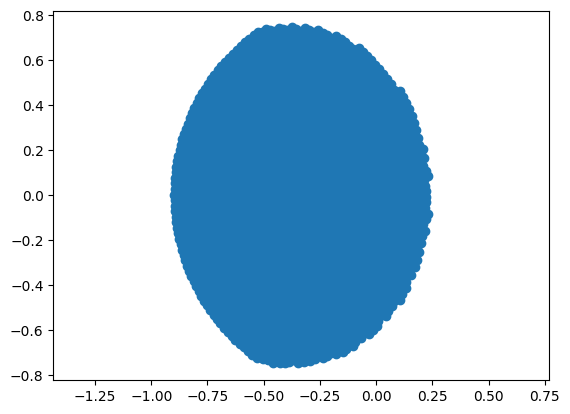

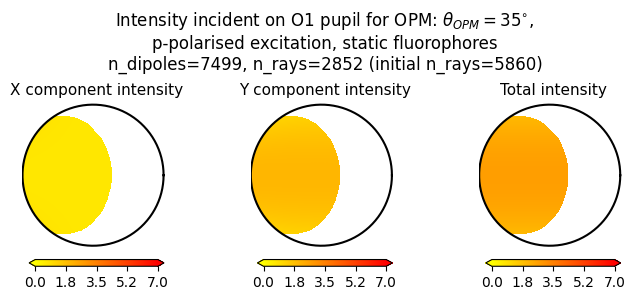

Full sphere generation
cap method area sum 12.564694874875116
expected area sum 6.283185307179586
plot exc arrow


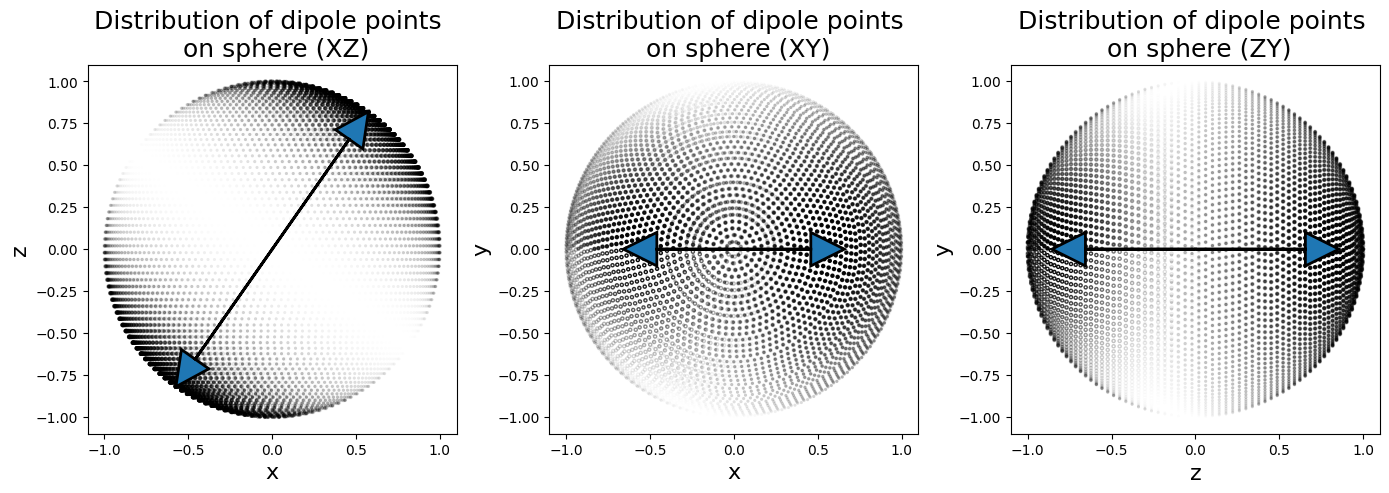

cap method area sum 3.5738661437335946
expected area sum 3.5738661731158983


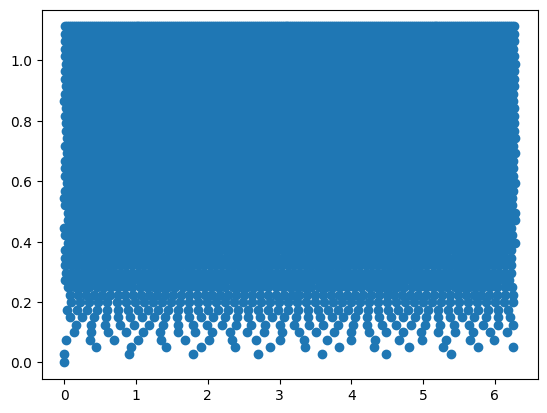

n_dipoles 7499
n_rays 5860
pvec shape (7499, 1, 3)
nvec shape (1, 5860, 3)
(7499, 5860, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
cap method area sum 6.283185277694102
expected area sum 6.283185307179586
n_dipoles 7499
n_rays 10251
pvec shape (7499, 1, 3)
nvec shape (1, 10251, 3)
(7499, 10251, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
n rays 2pi =  10251
(5860, 3, 1)
n rays =  5860
NA area vs real area? 3.5738661437335946 3.5738661731158983
half_sphere_energy 1.3958596987522367
initial_energy 0.7445027791581074
rays when NA scaled up to hemisphere 10302.418842583545
initialisation time in system 20.640369s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53340>
CURVED REFRACTION
max rho curved 0.002690606786877742
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53820>
max rho flat 0.0035785070265473974
FLAT REFRACTION
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53B80>
CURVED REFRACTION
max rho curved 0.0
ELEMEN

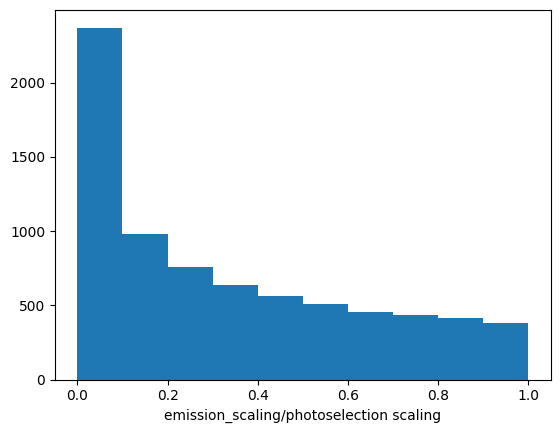

Limiting radius for detector: 0.0036
Energy ratio (efficiency): 0.5461708863565795
Total energy per dipole per ray: 0.40662574278772023
Energy from Ix 466.4587355148517
Energy from Iy 200.27772212055285
X/Y energy ratio = 2.329059520829166
Half sphere energy 1.3958596987522367
Initial energy 0.7445027791581074
half sphere energy NA 0.7939628545544961
maxr 0.0036
3008 escaped out of 5860
Saved checkpoint with 10000 rays
3008 escaped out of 5860
time in trace_rays 36.917299s
ray count 2852
max Ix 2.9599891511486147
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.0029834384093780034
max_r_reduced 0.002983203285190457 max_r 0.0029834384093780034


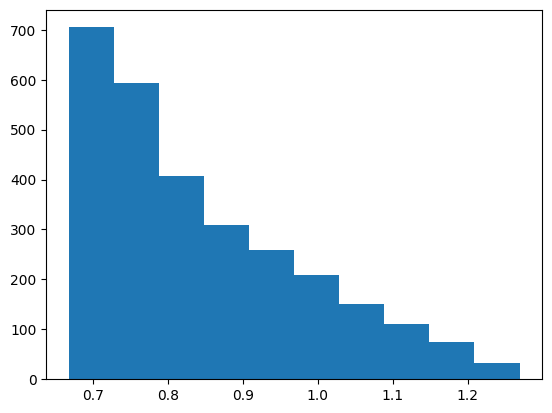

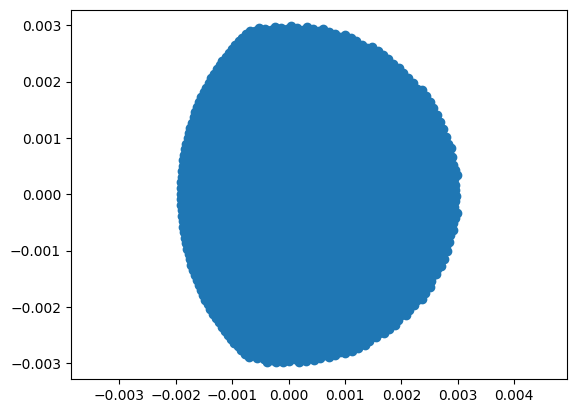

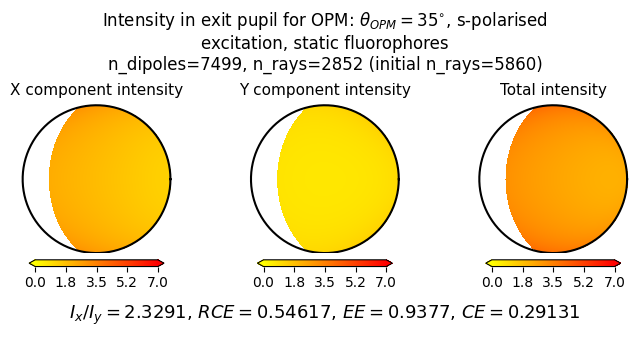

ray count 2852
max Ix 2.0001364149199836
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.8968627153376838
max_r_reduced 0.8960760143583334 max_r 0.8968627153376838


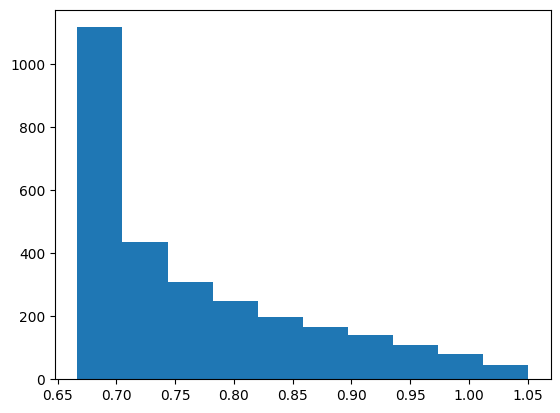

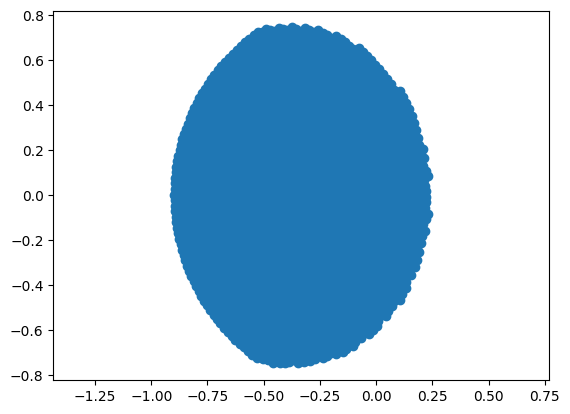

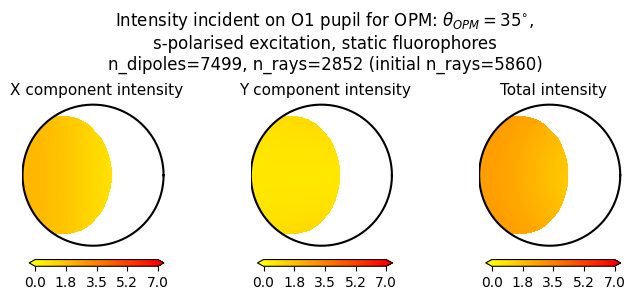

Full sphere generation
cap method area sum 12.564694874875116
expected area sum 6.283185307179586
cap method area sum 3.5738661437335946
expected area sum 3.5738661731158983


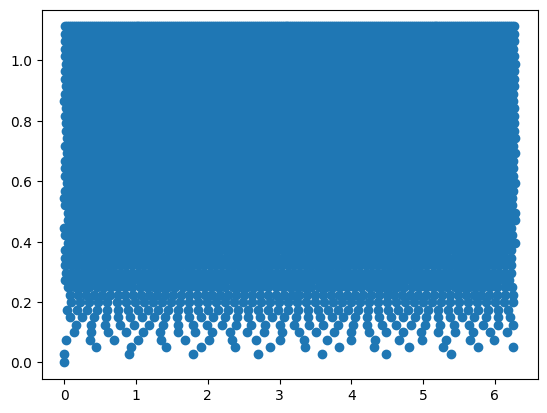

n_dipoles 7499
n_rays 5860
pvec shape (7499, 1, 3)
nvec shape (1, 5860, 3)
(7499, 5860, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
cap method area sum 6.283185277694102
expected area sum 6.283185307179586
n_dipoles 7499
n_rays 10251
pvec shape (7499, 1, 3)
nvec shape (1, 10251, 3)
(7499, 10251, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
n rays 2pi =  10251
(5860, 3, 1)
n rays =  5860
NA area vs real area? 3.5738661437335946 3.5738661731158983
half_sphere_energy 4.188790708032343
initial_energy 2.382624774981475
rays when NA scaled up to hemisphere 10302.418842583545
initialisation time in system 21.217676s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53340>
CURVED REFRACTION
max rho curved 0.002690606786877742
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53820>
max rho flat 0.0035785070265473974
FLAT REFRACTION
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53B80>
CURVED REFRACTION
max rho curved 0.0
ELEMENT:

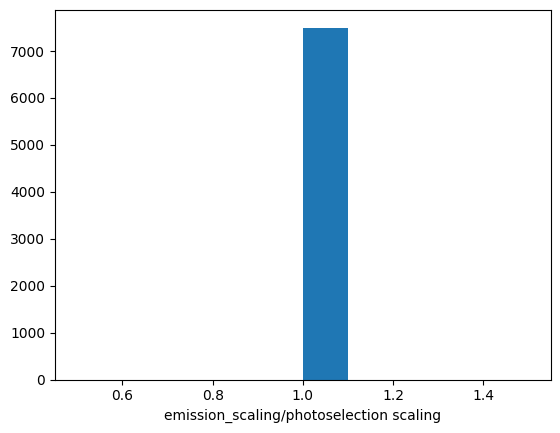

Limiting radius for detector: 0.0036
Energy ratio (efficiency): 0.4133122836115374
Total energy per dipole per ray: 0.9847680867370188
Energy from Ix 807.3342191179798
Energy from Iy 807.371188469075
X/Y energy ratio = 0.9999542102175267
Half sphere energy 4.188790708032343
Initial energy 2.382624774981475
half sphere energy NA 2.3825777265821206
maxr 0.0036
3438 escaped out of 5860
Saved checkpoint with 10000 rays
3438 escaped out of 5860
time in trace_rays 36.754633s
ray count 2422
max Ix 5.08956167839191
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.0029970738062534423
max_r_reduced 0.0029961110217901943 max_r 0.0029970738062534423


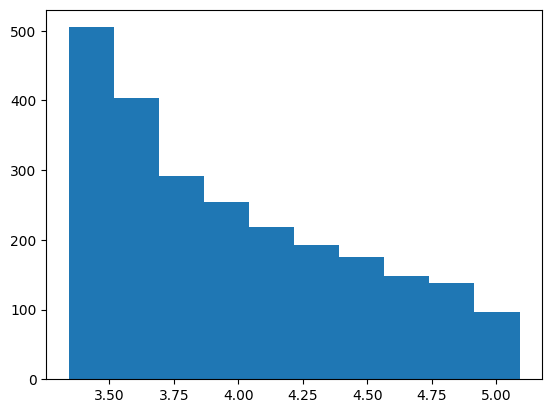

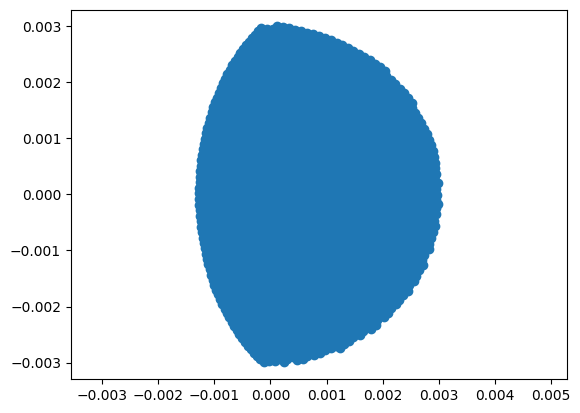

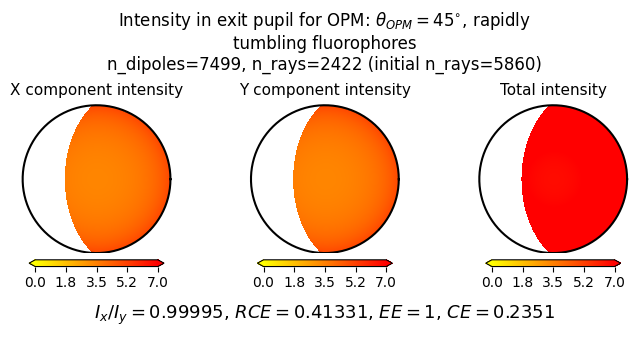

ray count 2422
max Ix 3.333547387795266
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.8968627153376838
max_r_reduced 0.8708015148116347 max_r 0.8968627153376838


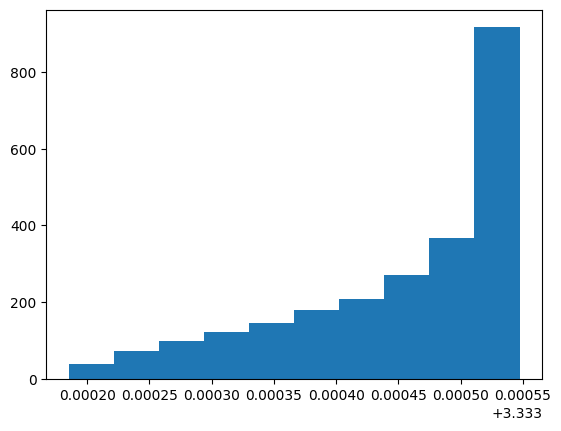

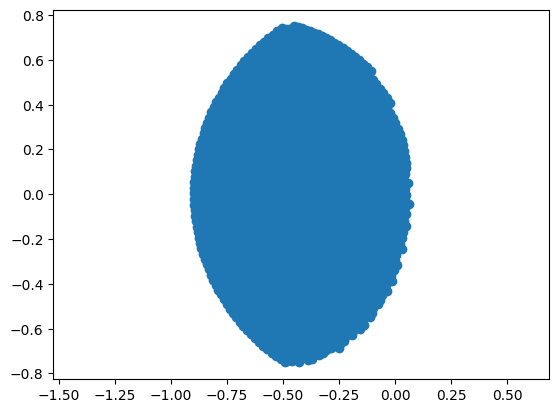

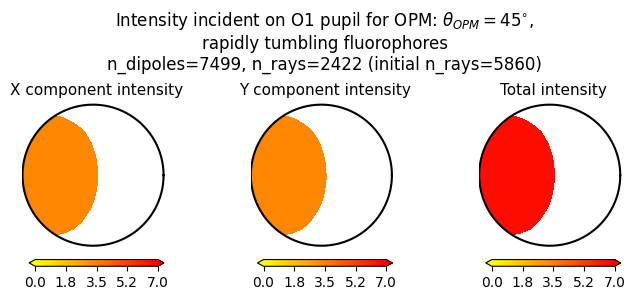

Full sphere generation
cap method area sum 12.564694874875116
expected area sum 6.283185307179586
plot exc arrow


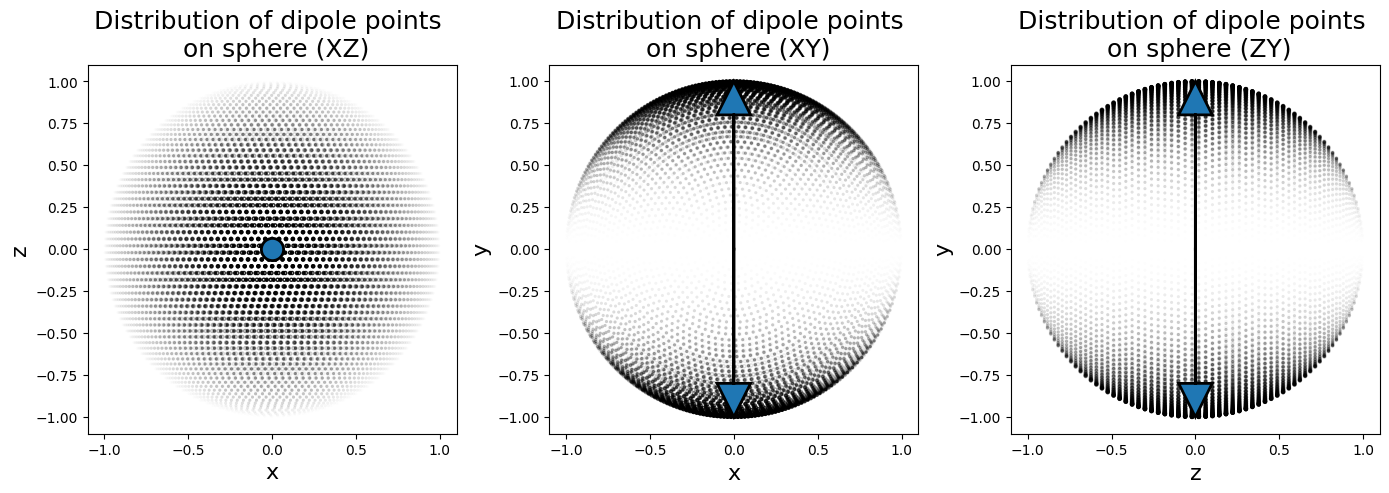

cap method area sum 3.5738661437335946
expected area sum 3.5738661731158983


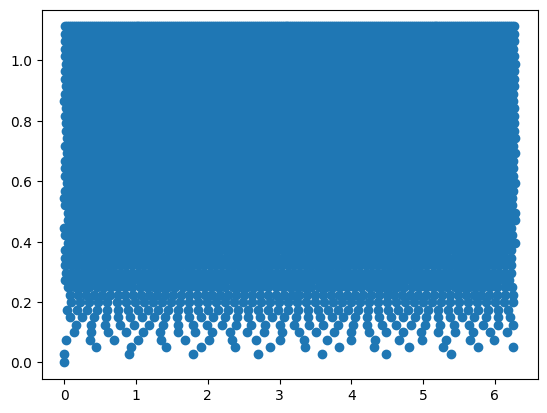

n_dipoles 7499
n_rays 5860
pvec shape (7499, 1, 3)
nvec shape (1, 5860, 3)
(7499, 5860, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
cap method area sum 6.283185277694102
expected area sum 6.283185307179586
n_dipoles 7499
n_rays 10251
pvec shape (7499, 1, 3)
nvec shape (1, 10251, 3)
(7499, 10251, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
n rays 2pi =  10251
(5860, 3, 1)
n rays =  5860
NA area vs real area? 3.5738661437335946 3.5738661731158983
half_sphere_energy 1.397507898300317
initial_energy 0.843768519240068
rays when NA scaled up to hemisphere 10302.418842583545
initialisation time in system 22.171193s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53340>
CURVED REFRACTION
max rho curved 0.002690606786877742
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53820>
max rho flat 0.0035785070265473974
FLAT REFRACTION
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53B80>
CURVED REFRACTION
max rho curved 0.0
ELEMENT:

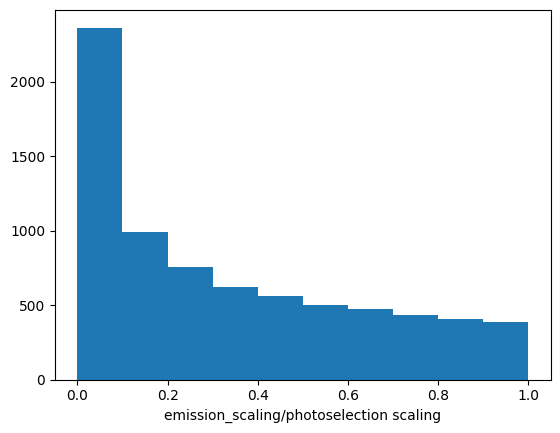

Limiting radius for detector: 0.0036
Energy ratio (efficiency): 0.43239325499830106
Total energy per dipole per ray: 0.36483981649930963
Energy from Ix 162.71056746038016
Energy from Iy 435.51030559460236
X/Y energy ratio = 0.3736089947130674
Half sphere energy 1.397507898300317
Initial energy 0.843768519240068
half sphere energy NA 0.794900347928106
maxr 0.0036
3438 escaped out of 5860
Saved checkpoint with 10000 rays
3438 escaped out of 5860
time in trace_rays 36.306786s
ray count 2422
max Ix 1.063535375371709
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.0029970738062534423
max_r_reduced 0.0029961110217901943 max_r 0.0029970738062534423


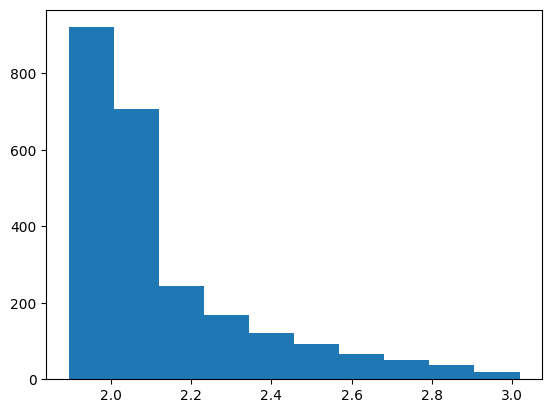

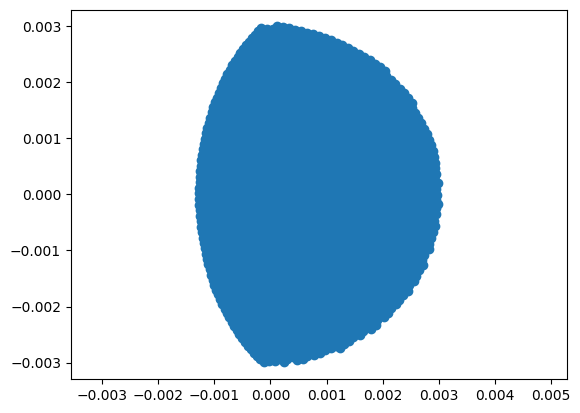

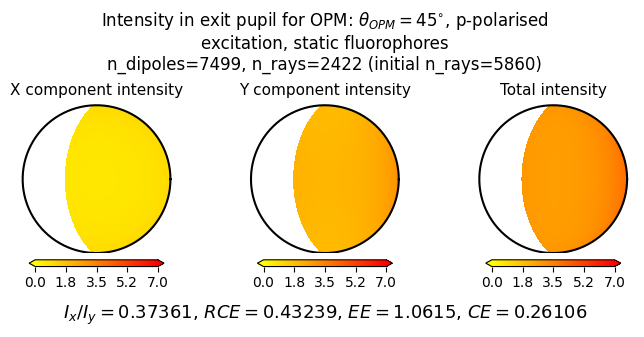

ray count 2422
max Ix 0.7707130161095533
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.8968627153376838
max_r_reduced 0.8708015148116347 max_r 0.8968627153376838


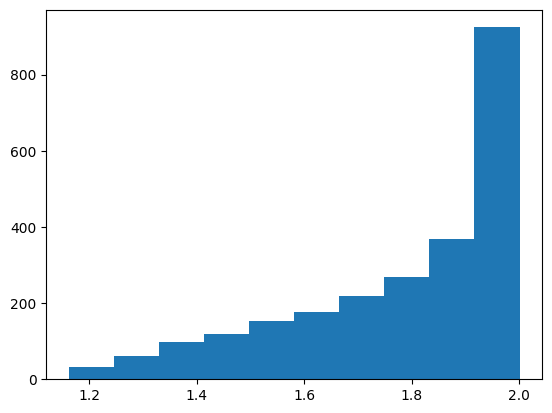

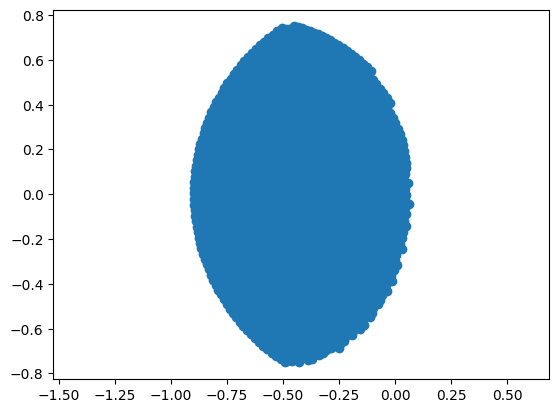

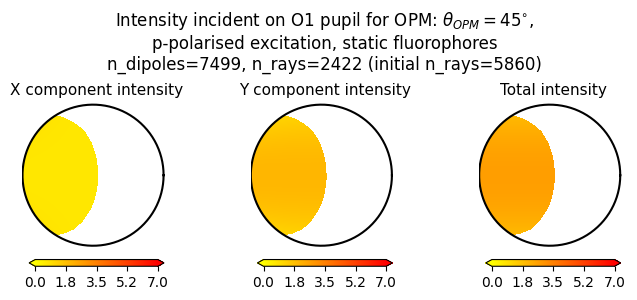

Full sphere generation
cap method area sum 12.564694874875116
expected area sum 6.283185307179586
plot exc arrow


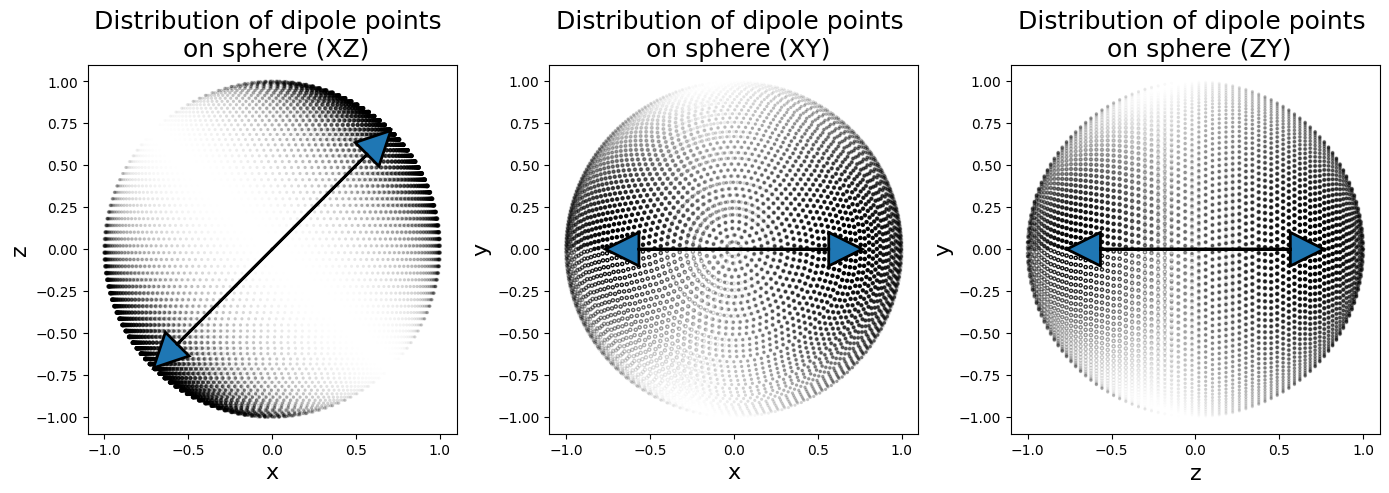

cap method area sum 3.5738661437335946
expected area sum 3.5738661731158983


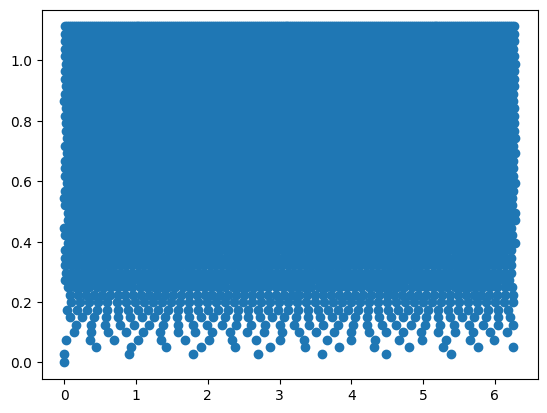

n_dipoles 7499
n_rays 5860
pvec shape (7499, 1, 3)
nvec shape (1, 5860, 3)
(7499, 5860, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
cap method area sum 6.283185277694102
expected area sum 6.283185307179586
n_dipoles 7499
n_rays 10251
pvec shape (7499, 1, 3)
nvec shape (1, 10251, 3)
(7499, 10251, 3, 1)
(7499, 1, 1, 1)
initial energy shape ()
n rays 2pi =  10251
(5860, 3, 1)
n rays =  5860
NA area vs real area? 3.5738661437335946 3.5738661731158983
half_sphere_energy 1.396216507121376
initial_energy 0.7697612404159438
rays when NA scaled up to hemisphere 10302.418842583545
initialisation time in system 21.364773s
Flat pupil
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53340>
CURVED REFRACTION
max rho curved 0.002690606786877742
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53820>
max rho flat 0.0035785070265473974
FLAT REFRACTION
ELEMENT: <opmsim.optical_elements.SineLens object at 0x000001F705A53B80>
CURVED REFRACTION
max rho curved 0.0
ELEMENT

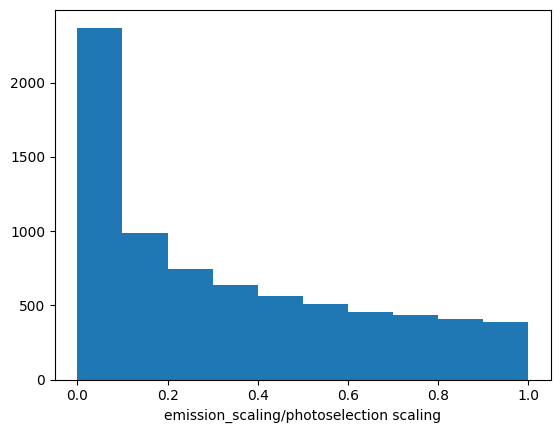

Limiting radius for detector: 0.0036
Energy ratio (efficiency): 0.48206391941298665
Total energy per dipole per ray: 0.3710741205671122
Energy from Ix 445.7615844854909
Energy from Iy 162.68155777825305
X/Y energy ratio = 2.740086771809112
Half sphere energy 1.396216507121376
Initial energy 0.7697612404159438
half sphere energy NA 0.794165806607302
maxr 0.0036
3438 escaped out of 5860
Saved checkpoint with 10000 rays
3438 escaped out of 5860
time in trace_rays 35.823503s
ray count 2422
max Ix 3.051685104737982
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.0029970738062534423
max_r_reduced 0.0029961110217901943 max_r 0.0029970738062534423


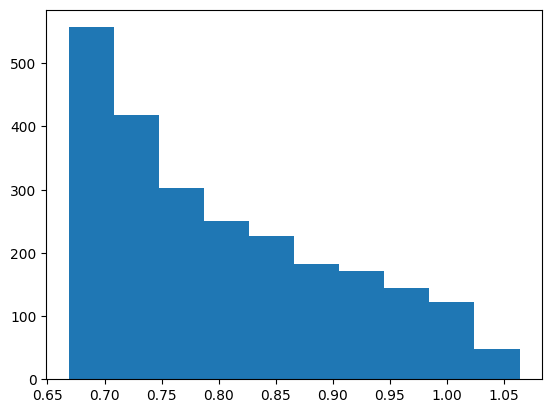

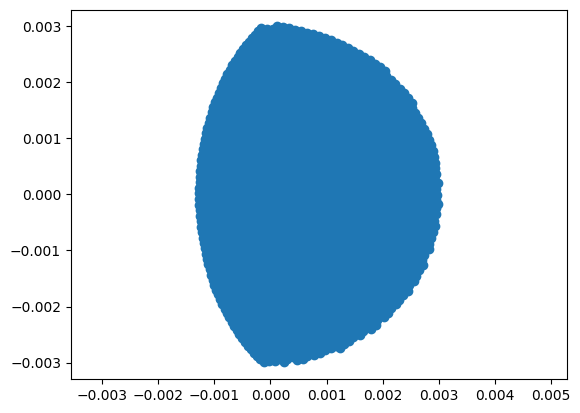

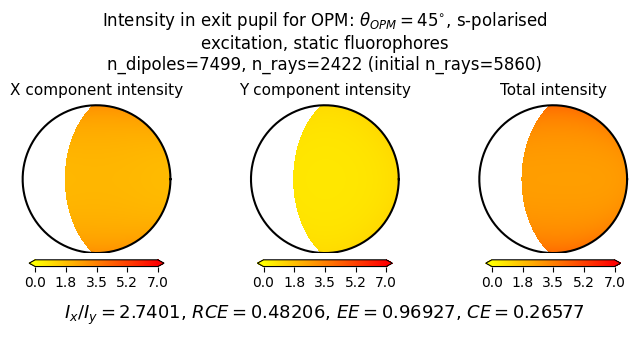

ray count 2422
max Ix 2.000294235890056
scale range in _plot_unstructured [0, 7, 5]
min for scale 0
max for scale 7
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.8968627153376838
max_r_reduced 0.8708015148116347 max_r 0.8968627153376838


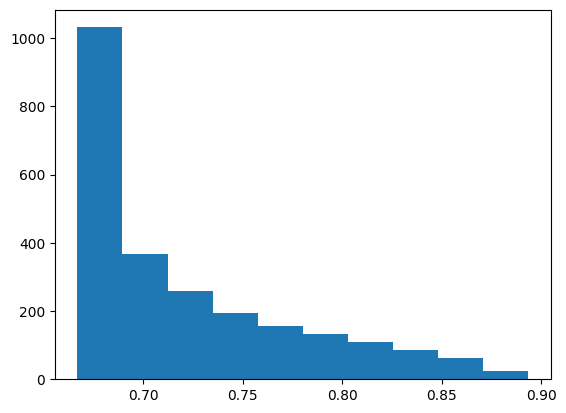

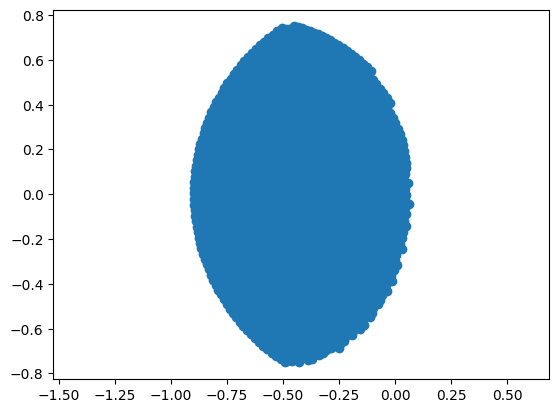

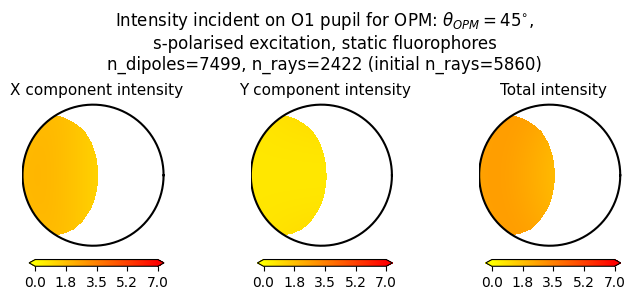

In [42]:
with open(save_details, 'a') as f:
    fs=[el.focal_length for el in elements_fun(0)]
    f.write(",".join(str(item) for item in fs))
    
with open(save_filename, 'a') as f:
    f.write("angle,polarisation,NA1,NA2,NA3,RCE,CE,EE\n")
    for opm_angle in opm_angles:

        # un/depolarised
        source = dipole_source.DipoleSource()
        source.generate_dipoles(dipole_count)

        system = OpticalSystem("OPM (%d degrees) rapid tumbling" % opm_angle, elements_fun(opm_angle), source, options)
        system.trace()
        plot_options['title'] = \
            r'Intensity in exit pupil for OPM: $\theta_{OPM}=%d^{\circ}$, rapidly tumbling fluorophores' \
            % (opm_angle)
        pupil_fig = system.detector.plot_pupil(**plot_options_un)
        pupil_fig.savefig(os.path.join(savepath_full, "pupil_plot_tumbling_%d.png" % (opm_angle)), bbox_inches='tight' )

        f.write("%0.1f,%s, %.2f,%.2f,%.2f,%0.5f,%0.5f,%0.5f\n" % 
            (opm_angle, "unpolarised", NA_O1, elements_fun(opm_angle)[3].NA, elements_fun(opm_angle)[4].NA,
             system.detector.relative_collection_efficiency,
             system.detector.emission_efficiency, 
             system.detector.collection_efficiency)
            )

        plot_options['title'] = \
            r'Intensity incident on O1 pupil for OPM: $\theta_{OPM}=%d^{\circ}$, rapidly tumbling fluorophores'\
            % (opm_angle)
        pupil_fig_i = system.initial_detector.plot_pupil(**plot_options_un)
        pupil_fig_i.savefig(os.path.join(savepath_full, "initial_pupil_plot_tumbling_%d.png" % (opm_angle)), bbox_inches='tight' )

        # p-polarised 
        source = dipole_source.DipoleSource()
        source.generate_dipoles(dipole_count)
        source.classical_photoselection(p_pol)

        system = OpticalSystem("OPM system (%d degrees) p-polarised" % opm_angle, elements_fun(opm_angle), source, options)
        system.trace()
        plot_options['title'] = \
            r'Intensity in exit pupil for OPM: $\theta_{OPM}=%d^{\circ}$, p-polarised excitation, static fluorophores'\
            % (opm_angle)
        pupil_fig = system.detector.plot_pupil(**plot_options_p)
        pupil_fig.savefig(os.path.join(savepath_full, "pupil_plot_p-polarised_%d.png" % (opm_angle)), bbox_inches='tight' )

        f.write("%0.1f,%s, %.2f,%.2f,%.2f,%0.5f,%0.5f,%0.5f\n" % 
            (opm_angle, "p-polarised", NA_O1, elements_fun(opm_angle)[3].NA, elements_fun(opm_angle)[4].NA,
             system.detector.relative_collection_efficiency,
             system.detector.emission_efficiency, 
             system.detector.collection_efficiency)
            )

        plot_options['title'] = \
            r'Intensity incident on O1 pupil for OPM: $\theta_{OPM}=%d^{\circ}$, p-polarised excitation, static fluorophores'\
            % (opm_angle)
        pupil_fig_i = system.initial_detector.plot_pupil(**plot_options_p)
        pupil_fig_i.savefig(os.path.join(savepath_full, "initial_pupil_plot_p-polarised_%d.png" % (opm_angle)), bbox_inches='tight')

        # s-polarised
        source = dipole_source.DipoleSource()
        source.generate_dipoles(dipole_count)
        source.classical_photoselection(s_pol(opm_angle))

        system = OpticalSystem("OPM system (%d degrees) s-polarised" % opm_angle, elements_fun(opm_angle), source, options)
        system.trace()
        plot_options['title'] = \
            r'Intensity in exit pupil for OPM: $\theta_{OPM}=%d^{\circ}$, s-polarised excitation, static fluorophores'\
            % (opm_angle)
        pupil_fig = system.detector.plot_pupil(**plot_options_s)
        pupil_fig.savefig(os.path.join(savepath_full, "pupil_plot_s-polarised_%d.png" % (opm_angle)), bbox_inches='tight' )

        f.write("%0.1f,%s, %.2f,%.2f,%.2f,%0.5f,%0.5f,%0.5f\n" % 
            (opm_angle, "s-polarised", NA_O1, elements_fun(opm_angle)[3].NA, elements_fun(opm_angle)[4].NA,
             system.detector.relative_collection_efficiency,
             system.detector.emission_efficiency, 
             system.detector.collection_efficiency)
            )

        plot_options['title'] = \
            r'Intensity incident on O1 pupil for OPM: $\theta_{OPM}=%d^{\circ}$, s-polarised excitation, static fluorophores'\
            % (opm_angle)
        pupil_fig_i = system.initial_detector.plot_pupil(**plot_options_s)
        pupil_fig_i.savefig(os.path.join(savepath_full, "initial_pupil_plot_s-polarised_%d.png" % (opm_angle)), bbox_inches='tight' )



In [32]:
import json
fs=[el.focal_length for el in elements_fun(0)]
(",".join(str(item) for item in fs))


'0.003,0.18,0.162,0.0036,0.004'